# First Project

**This is airline passenger satisfaction data. I got this from Kaggle and we have to predict the customer satisfaction based on different features that are given**

In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [3]:
df.sample(3)

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
105273,105273,Female,Loyal Customer,14,Personal Travel,Eco,120,3,4,3,...,2,1,3,1,1,4,2,0,0.0,neutral or dissatisfied
5379,5379,Female,Loyal Customer,8,Personal Travel,Eco,631,3,1,4,...,2,1,2,3,2,4,2,0,0.0,neutral or dissatisfied
69550,69550,Female,Loyal Customer,60,Business travel,Business,2186,4,3,3,...,2,2,2,4,2,2,3,0,0.0,neutral or dissatisfied


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
df.shape

(129880, 23)

So this will help me know the shape of given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [9]:
df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(),inplace = True)

C:\Users\kriti\AppData\Local\Temp\ipykernel_11564\107239344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median(),inplace = True)


In [10]:
df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.sample(5)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
80295,Female,Loyal Customer,32,Personal Travel,Eco,345,4,5,4,5,...,4,5,3,5,5,4,4,0,0.0,neutral or dissatisfied
127720,Female,disloyal Customer,20,Business travel,Eco,726,2,2,2,4,...,5,1,4,4,1,3,5,0,0.0,neutral or dissatisfied
84559,Female,disloyal Customer,37,Business travel,Eco,152,4,4,4,5,...,4,4,3,5,5,1,4,0,0.0,neutral or dissatisfied
86984,Female,Loyal Customer,43,Business travel,Business,1888,1,1,1,1,...,4,4,4,4,4,4,5,0,0.0,satisfied
56986,Male,Loyal Customer,39,Personal Travel,Eco,397,2,1,2,3,...,3,2,3,4,3,4,3,10,5.0,neutral or dissatisfied


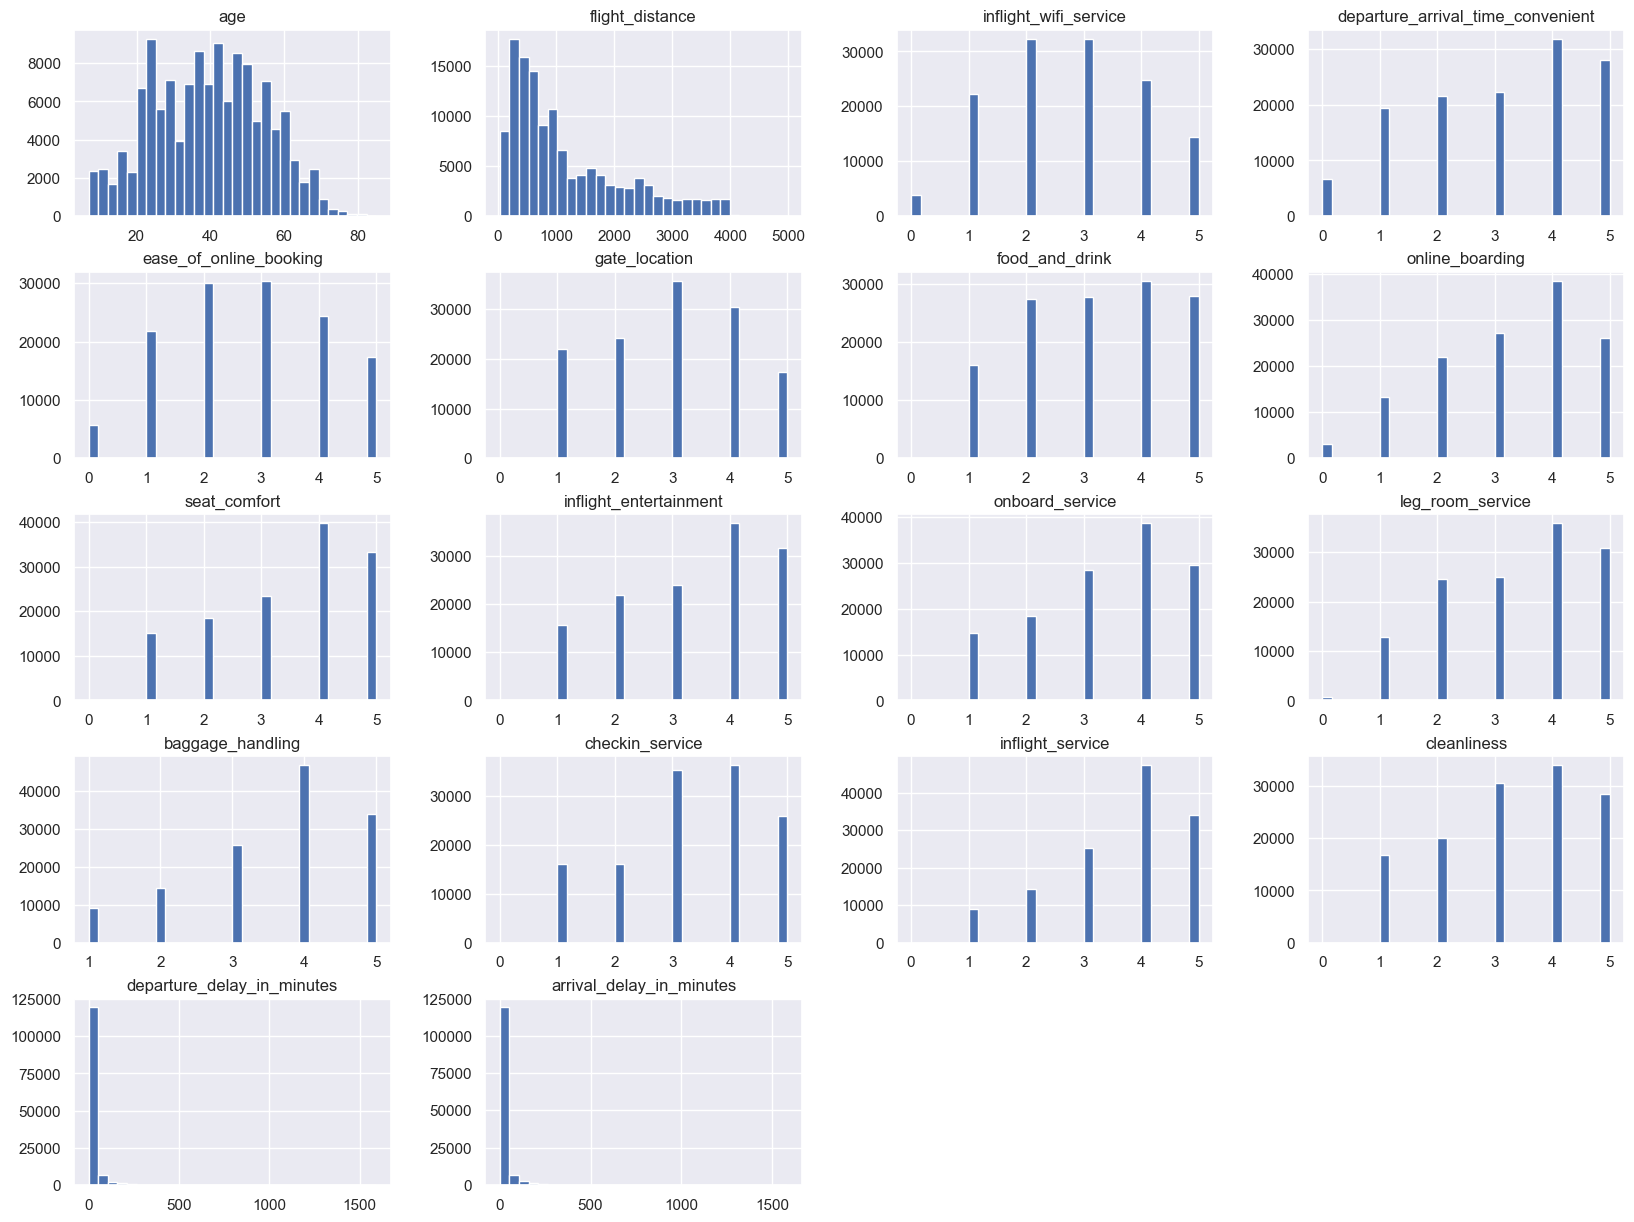

In [16]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

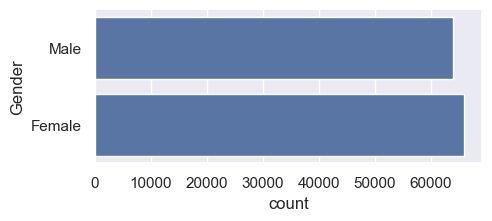

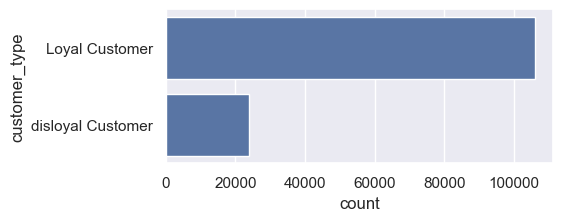

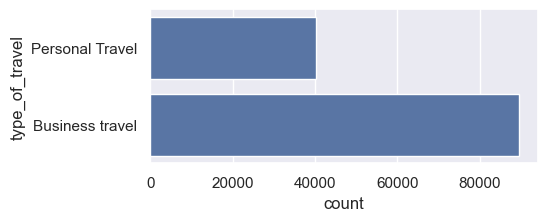

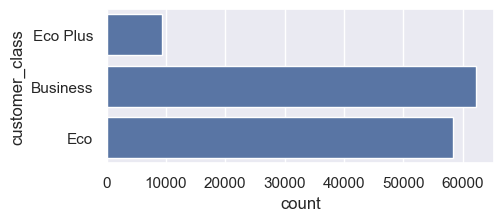

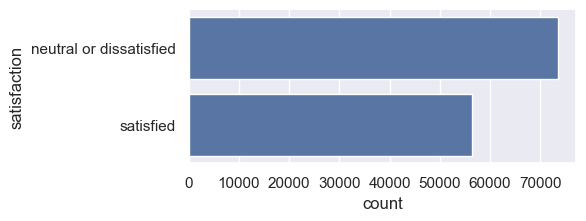

In [17]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    plt.figure(figsize=(5, 2))
    sns.countplot(y=col, data=df)
    plt.show()

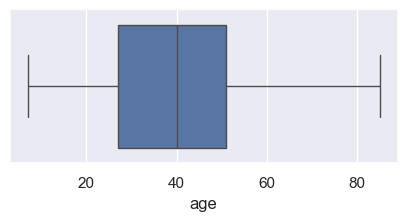

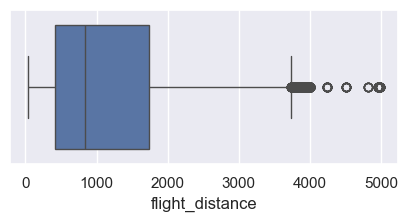

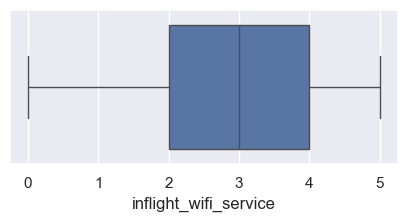

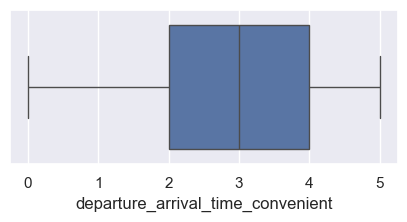

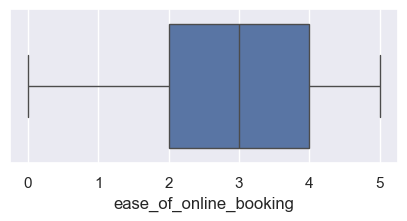

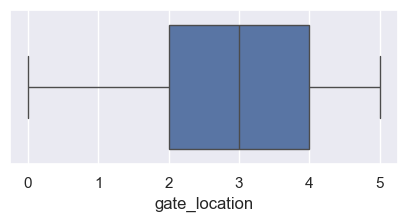

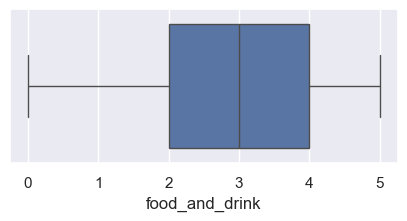

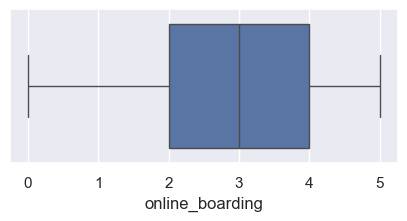

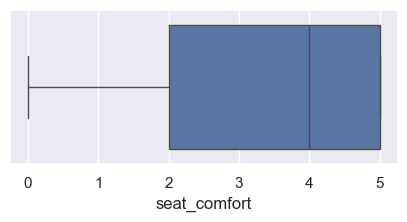

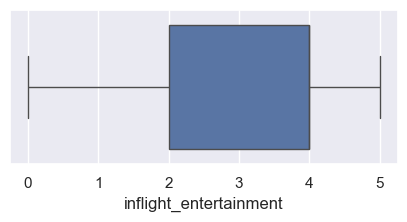

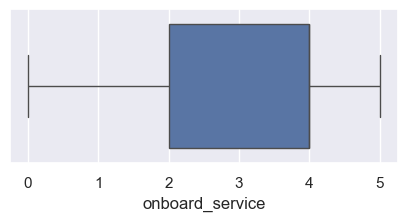

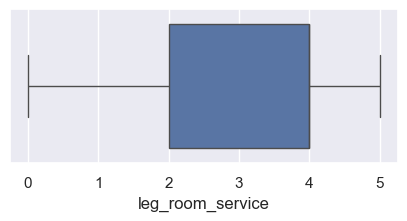

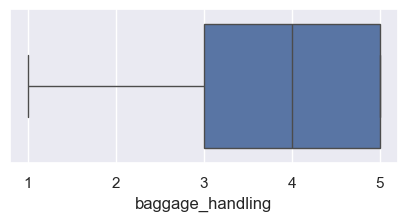

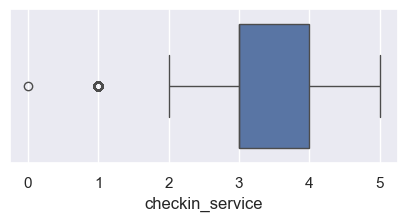

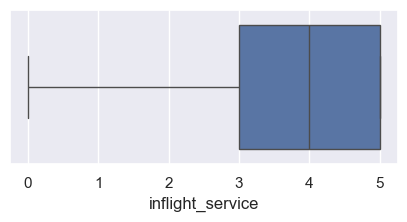

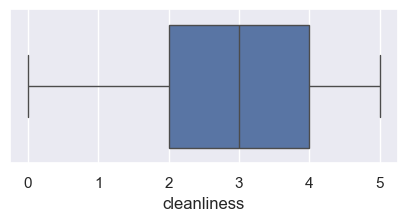

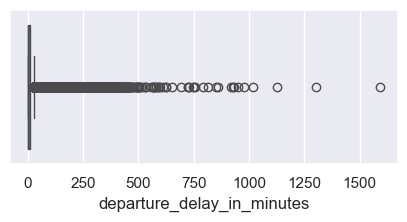

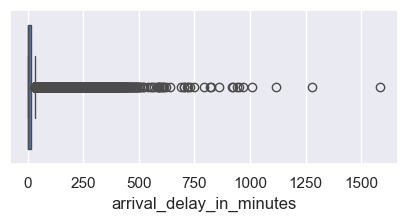

In [18]:
numerica_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerica_columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.show()

In [21]:
df1 = df.copy()

In [22]:
non_numeric_columns

Index(['Gender', 'customer_type', 'type_of_travel', 'customer_class',
       'satisfaction'],
      dtype='object')

In [23]:
df_OneHotEncoder = pd.get_dummies(df1,columns = non_numeric_columns, drop_first = True)

In [24]:
df_OneHotEncoder

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,True,False,True,False,True,False
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,False,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0.0,True,True,False,False,False,False
129876,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0.0,True,False,False,False,False,True
129877,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0.0,False,False,True,True,False,False
129878,14,1127,3,3,3,3,4,4,4,4,...,5,4,0,0.0,True,False,False,False,False,True


In [27]:
# Convert True/False one-hot columns to 0/1
df_OneHotEncoder = df_OneHotEncoder.astype(int)

In [26]:
df_OneHotEncoder

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18,1,0,1,0,1,0
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6,1,1,0,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34,526,3,3,3,1,4,3,4,4,...,5,4,0,0,1,1,0,0,0,0
129876,23,646,4,4,4,4,4,4,4,4,...,5,4,0,0,1,0,0,0,0,1
129877,17,828,2,5,1,5,2,1,2,2,...,4,2,0,0,0,0,1,1,0,0
129878,14,1127,3,3,3,3,4,4,4,4,...,5,4,0,0,1,0,0,0,0,1


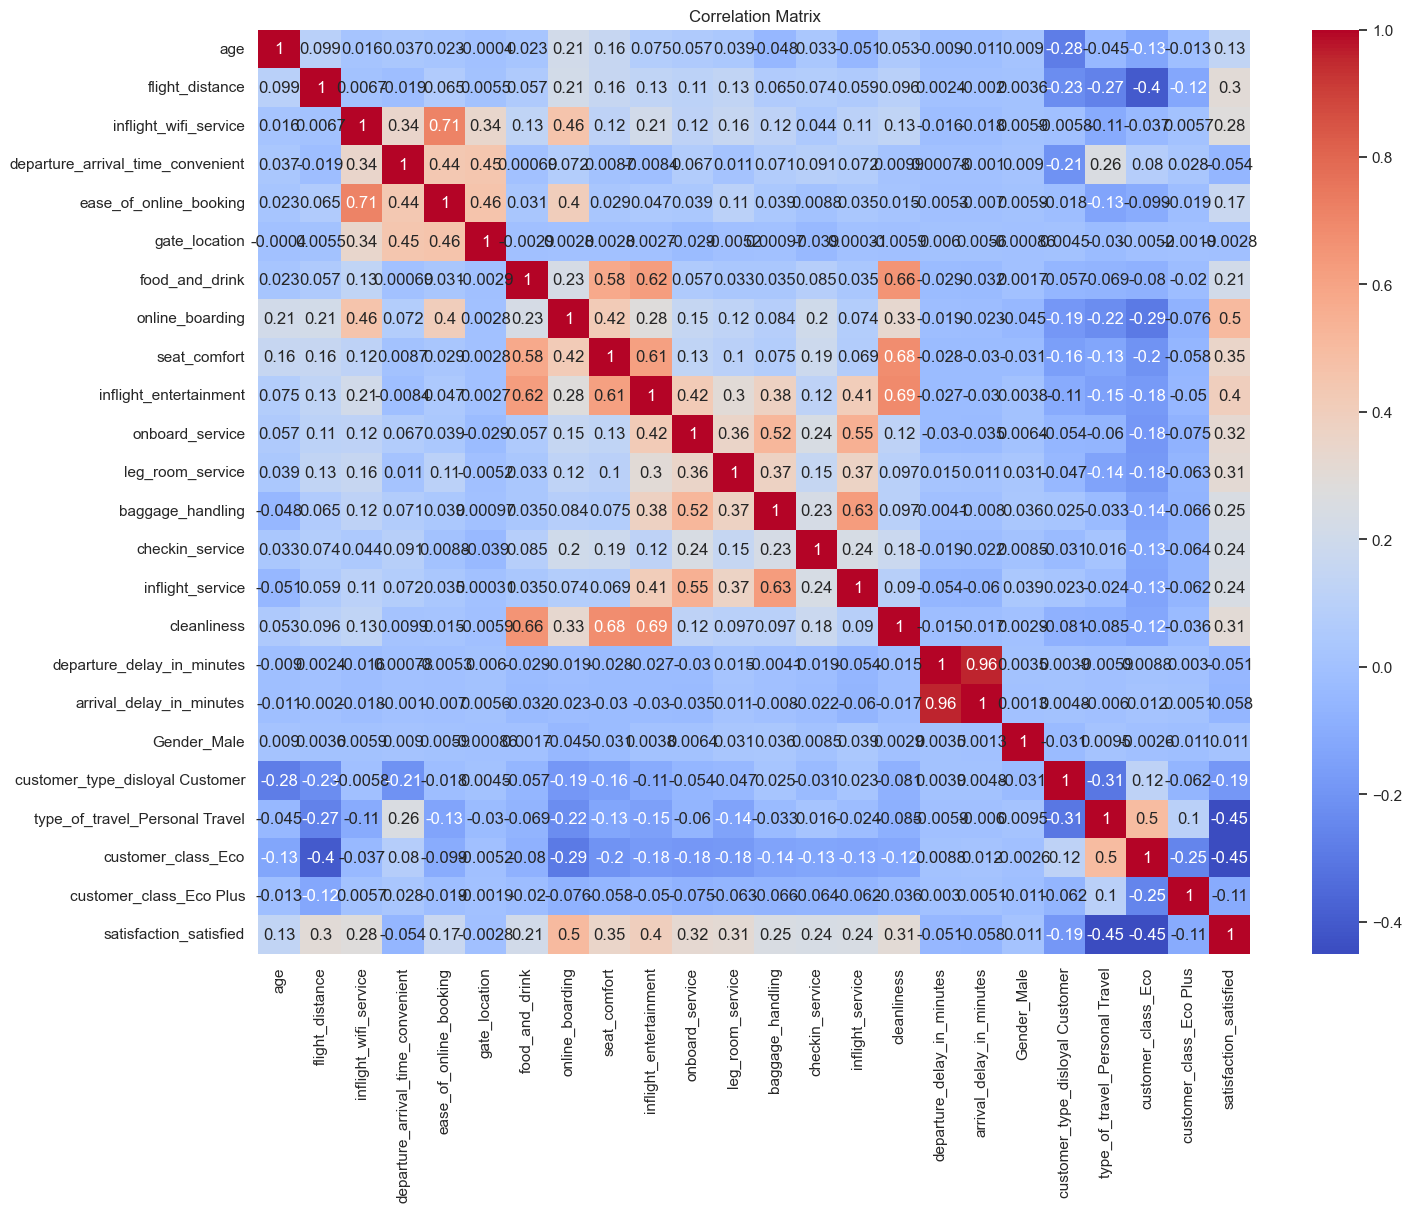

In [28]:
# Correlation matrix
corr_matrix = df_OneHotEncoder.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(df_OneHotEncoder.iloc[:,:-1],df_OneHotEncoder.iloc[:,-1],test_size = 0.2, random_state = 9)

In [34]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((103904, 23), (25976, 23), (103904,), (25976,))

In [35]:
lr = LogisticRegression(solver = 'lbfgs',penalty = 'l2', max_iter = 100000)
lr.fit(xtrain,ytrain)

pred = lr.predict(xtest)

In [36]:
print(f"Accuracy of my first model is : {accuracy_score(pred,ytest)}")

Accuracy of my first model is : 0.8714967662457653


In [37]:
cm = confusion_matrix(pred,ytest)
cm

array([[13206,  1908],
       [ 1430,  9432]], dtype=int64)

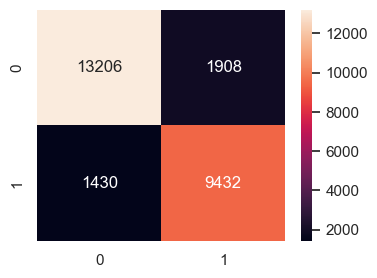

In [38]:
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

pred = dt.predict(xtest)

In [42]:
print(f"Accuracy of my first model is : {accuracy_score(pred,ytest)}")

Accuracy of my first model is : 0.944256236526024


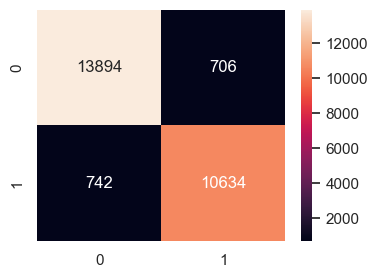

In [43]:
cm = confusion_matrix(pred,ytest)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(xtrain,ytrain)

pred = rfc.predict(xtest)

In [46]:
print(f"Accuracy of my first model is : {accuracy_score(pred,ytest)}")

Accuracy of my first model is : 0.9621958731136434


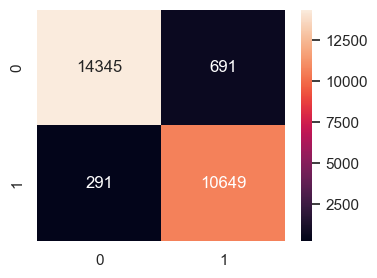

In [47]:
cm = confusion_matrix(pred,ytest)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show()

In [51]:
from sklearn.metrics import roc_curve, auc

rf_probs = rfc.predict_proba(xtest)[:, 1]
dt_probs = dt.predict_proba(xtest)[:, 1]
lr_probs = lr.predict_proba(xtest)[:, 1]

# Compute ROC curve and ROC area
fpr_rf, tpr_rf, _ = roc_curve(ytest, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(ytest, dt_probs)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(ytest, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

Text(0, 0.5, 'True Positive Rate')

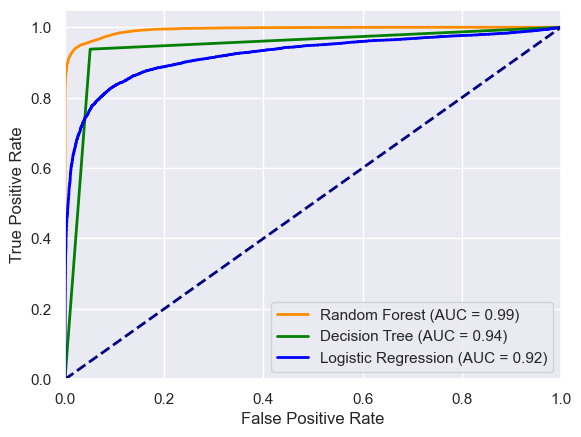

In [53]:
# Plot ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')